## OverView of the DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
print("Customer Data")
customers.head()

Customer Data


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
print("Products Data")
products.head()

Products Data


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
print("Transactions Data")
transactions.head()

Transactions Data


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
print("Customer Data Columns")
print(customers.columns)
print("Products Data Columns")
print(products.columns)
print("Transactions Data Columns")
print(transactions.columns)

Customer Data Columns
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Products Data Columns
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Transactions Data Columns
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


Check NULL values

In [9]:
print("Null values in Customer Data")
print(customers.isnull().sum())
print("Null values in Products Data")
print(products.isnull().sum())
print("Null values in Transactions Data")
print(transactions.isnull().sum())

Null values in Customer Data
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Null values in Products Data
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Null values in Transactions Data
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Check for DUPLICATE rows

In [10]:
print("Null values in Customer Data")
print(customers.duplicated().sum())
print("Null values in Products Data")
print(products.duplicated().sum())
print("Null values in Transactions Data")
print(transactions.duplicated().sum())

Null values in Customer Data
0
Null values in Products Data
0
Null values in Transactions Data
0


Transform SignupDate and TransactionDate intp datetime format for efficient EDA

In [11]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge the datasets

In [12]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
print("Merged Dataset Sample", merged_data.head())

Merged Dataset Sample   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetoo

Price_x and Price_y are the same, so merge them

In [13]:
merged_data.drop('Price_y', axis=1, inplace=True)
merged_data.rename(columns={'Price_x': 'Price'}, inplace=True)

# EDA

In [14]:
merged_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [16]:
merged_data.describe()

,TransactionDate,Quantity,TotalValue,Price,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,NaN


## Analysis

No of transactions per regions

In [17]:
region_counts = merged_data['Region'].value_counts().reset_index()
region_counts

,Region,count
0,South America,304
1,North America,244
2,Europe,234
3,Asia,218


Sales in different regions



In [18]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
sales_by_region

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


Top 10 products sold

In [19]:
prod = merged_data['ProductName'].value_counts()
top10 = prod.head(10).reset_index()
top10

,ProductName,count
0,ActiveWear Smartwatch,40
1,SoundWave Headphones,38
2,BookWorld Biography,30
3,ActiveWear Rug,29
4,SoundWave Cookbook,29
5,HomeSense Desk Lamp,28
6,ActiveWear Jacket,26
7,TechPro Textbook,25
8,TechPro T-Shirt,24
9,ActiveWear Textbook,23


Category wise quantity sold

In [20]:
category_quantity = merged_data.groupby('Category')['Quantity'].sum().reset_index()
category_quantity

,Category,Quantity
0,Books,681
1,Clothing,590
2,Electronics,627
3,Home Decor,639


Category-wise Sales Distribution

In [21]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
category_sales

,Category,TotalValue
0,Books,192147.47
1,Clothing,166170.66
2,Electronics,180783.50
3,Home Decor,150893.93


Total sales per year and per month

In [22]:
merged_data['Year'] = merged_data['TransactionDate'].dt.year
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

yearly_sales = merged_data.groupby('Year')['TotalValue'].sum().reset_index()
print("Yearly Sales")
print(yearly_sales)

print("\n--------------------------------------------------------\n")

monthly_sales = merged_data.groupby('Month')['TotalValue'].sum().reset_index()
print("Monthly Sales")
print(monthly_sales)

Yearly Sales
   Year  TotalValue
0  2023     3769.52
1  2024   686226.04

--------------------------------------------------------

Monthly Sales
      Month  TotalValue
0   2023-12     3769.52
1   2024-01    66376.39
2   2024-02    51459.27
3   2024-03    47828.73
4   2024-04    57519.06
5   2024-05    64527.74
6   2024-06    48771.18
7   2024-07    71366.39
8   2024-08    63436.74
9   2024-09    70603.75
10  2024-10    47063.22
11  2024-11    38224.37
12  2024-12    59049.20


DaysSinceSignup for analyzing Customer Retention


In [23]:
customers['DaysSinceSignup'] = (pd.to_datetime('2025-01-01') - customers['SignupDate']).dt.days
print(customers[['CustomerID', 'CustomerName', 'DaysSinceSignup']].head())

  CustomerID        CustomerName  DaysSinceSignup
0      C0001    Lawrence Carroll              906
1      C0002      Elizabeth Lutz             1053
2      C0003      Michael Rivera              300
3      C0004  Kathleen Rodriguez              815
4      C0005         Laura Weber              870


## Visualizations

1. Total Sales by Region


<Figure size 500x300 with 0 Axes>

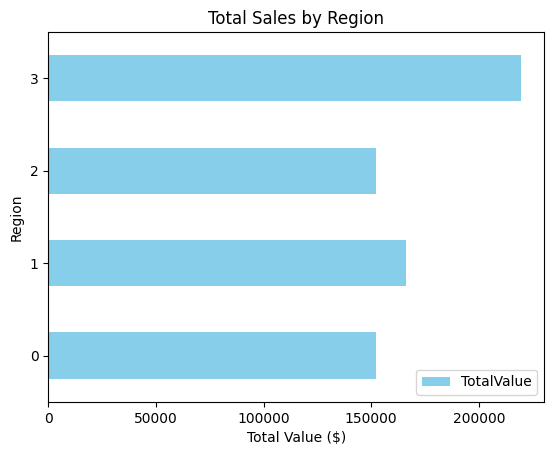

In [24]:
plt.figure(figsize=(5, 3))
sales_by_region.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Total Value ($)')
plt.ylabel('Region')

plt.show()

2. Top 10 Products by Sales

<Figure size 600x300 with 0 Axes>

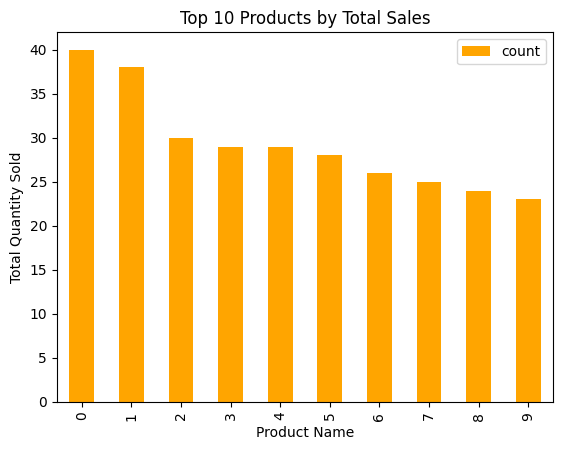

In [25]:
plt.figure(figsize=(6, 3))
top10.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
plt.show()

3. Category wise quantity sold

<Figure size 1000x600 with 0 Axes>

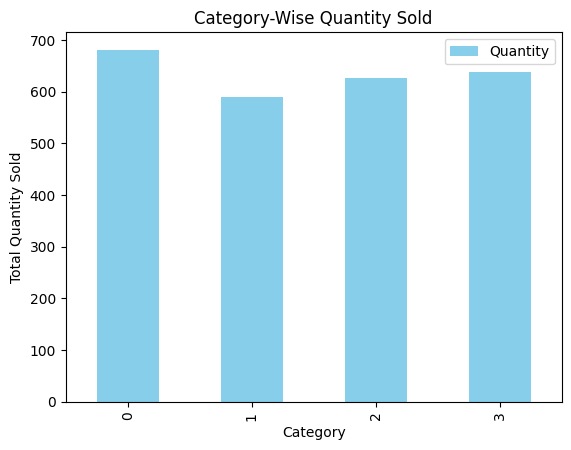

In [26]:
plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar', color='skyblue')
plt.title('Category-Wise Quantity Sold')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Category')
plt.show()

4. Category-wise Sales Distribution

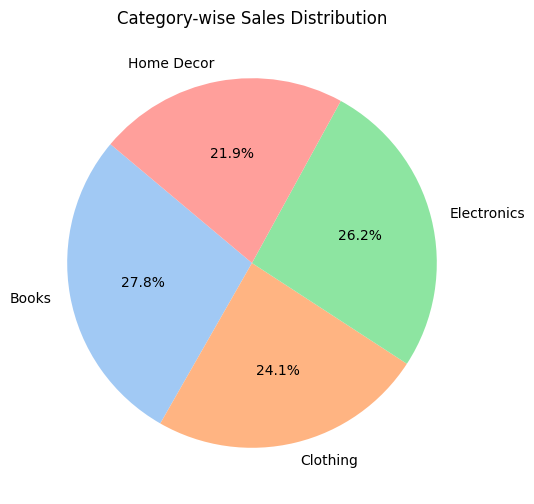

In [27]:
plt.figure(figsize=(10, 6))
category_sales.set_index('Category')['TotalValue'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Category-wise Sales Distribution')
plt.ylabel('')
plt.show()

5. Total sales by month

<Figure size 1200x600 with 0 Axes>

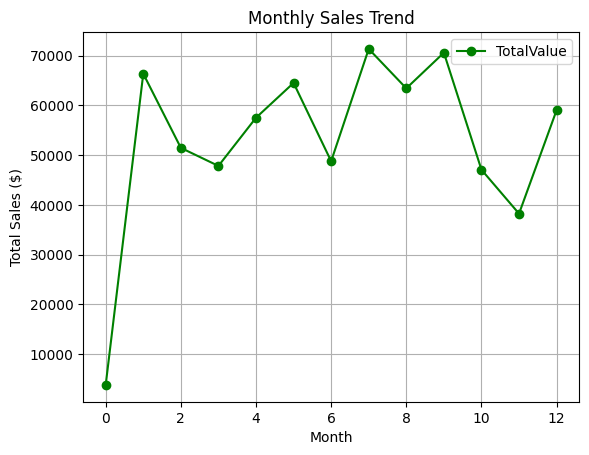

In [28]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.grid()
plt.show()

6. Visualize distribution of days since signup

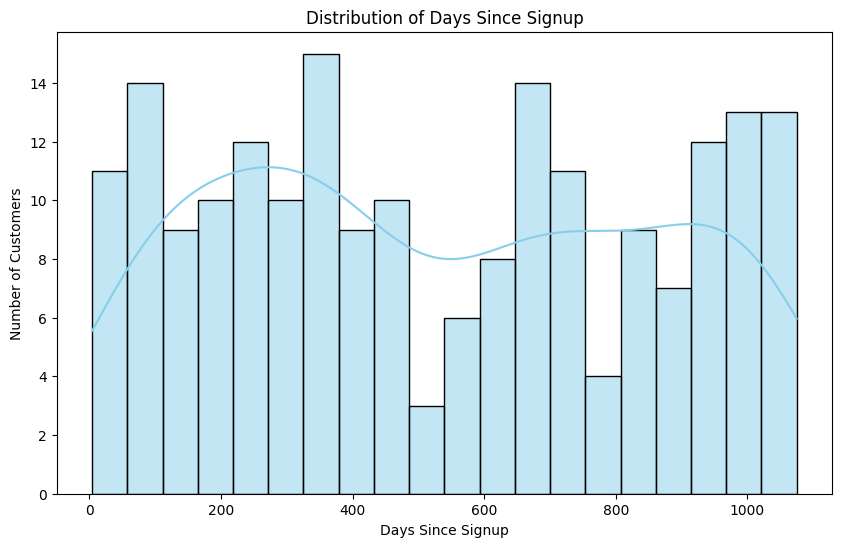

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(customers['DaysSinceSignup'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Days Since Signup')
plt.xlabel('Days Since Signup')
plt.ylabel('Number of Customers')
plt.show()

7. Correlation Analysis

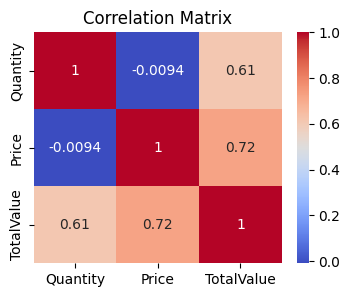

In [31]:
correlation_matrix = merged_data[['Quantity', 'Price', 'TotalValue']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()